##Programming Exercise Week 8
This classification machine learning model trains on court proceeding texts from the European Court of Human Rights and learns whether there has been a violation against a specific article of the European Convention on Human Rights or not. 

## Support Vector Machines
The model we use in this exercise is a Support Vector Machine (SVM) that you have already encountered in week 2 of this lecture! Here comes a small reminder what a SVM is: 
A SVM is a supervised learning model that can perform regression or (in our case) classification tasks. 
The main idea is to represent the training data as points in a vector space, learning a hyperplane that seperates the different classes and maximizing the margin between them during training and then being able to make predictions on new data points depending on which side of the plane they appear in the space.


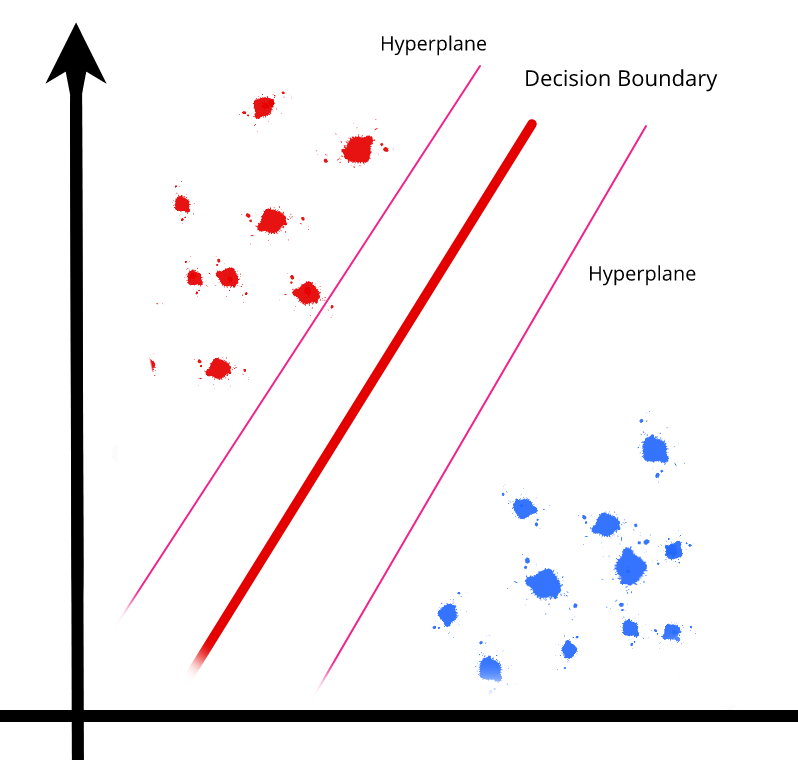

Picture source: https://towardsdatascience.com/breaking-down-the-support-vector-machine-svm-algorithm-d2c030d58d42

## All necessary imports

Some functions in this exercise are performed with [scikit-learn](https://scikit-learn.org/stable/), a machine learning module in python.

In [ ]:
import sklearn as skl #machine learning module for the support vector machine used here
from sklearn import pipeline 
from sklearn.feature_extraction.text import TfidfVectorizer
import tarfile #module to unzip the loaded data
import matplotlib.pyplot as plt #module to plot data
import glob #TBD: module to see and search local paths of your computer
import re #TBD: module to search for regular expressions in text
from nltk.corpus import stopwords #TBD: module to load list of stopwords
from random import shuffle #module to shuffle data, to remove ordering bias

## Load data files

In [ ]:
#Get the data with wget and the Dropbox URL
!wget "https://www.dropbox.com/s/lxpvvqdwby30157/crystal_ball_data.tar.gz" #link to data

z = tarfile.open("crystal_ball_data.tar.gz") #open tar compressed folder
z.extractall('./data/') #extract all files from tar folder
z.close()

## Pre-processing phase

In [ ]:
def extract_text(starts, ends, cases, violation):
    """
    Extract specified sections from a text.

    Arguments: 
      starts(str): Section where the extraction starts 
      ends(str): Section where the extraction stops
      cases(str): Path to the cases
      violation(): Target 

    Returns: 
      D(list): List of 1 tuple per article with 2 elements:
              1) Text
              2) Target
    """
    facts = []
    D = []
    
    for case in cases: #TBD: iterate over all text documents in the directory of the cases
        contline = '' #string where all lines of the relevant section will be appended to below
        with open(case, 'r', encoding="utf-8") as f:
            for line in f:
                wr = 0 #TBD: flag initialized at 0, will be set to one if a regex is found
                for line in f:
                    if wr == 0:
                        if re.search(starts, line) != None: #TBD: if we are at the line where the relevant section starts
                            wr = 1 # set flag to one
                    if wr == 1 and re.search(ends, line) == None: #TBD: if we are between starts and ends marks in the text 
                    #(if the flag has been set to one and the line does not contain the title of the enxt section)
                        contline += line 
                        contline += '\n'
                    elif re.search(ends, line) != None: #TBD: stop if the next section has been reached
                        break
                facts.append(contline) #put all of the lines of the relevant section into a list
    for i in range(len(facts)):
        D.append((facts[i], violation)) #TBD: D=List of the information of all cases: text and tag
    return D

In [ ]:
def extract_parts(train_path, violation, part): #extract text from different parts

    # the texts are typically divided into 4 different sections: facts, law,
    # circumstances and procedure. Not all of them are relevant to help the model
    # figure out if there has been a violation against the article or not, so this
    # function extracts only the relevant sections for a given article.

    """
    Arguments: 
        train_path(str): path to training data
        violation: target
        part(): section of the text
        
    Returns:
        D(list): 
    """
    cases = glob.glob(train_path)#TBD: list of all files (cases) in the folder of the training data

    facts = []
    D = []
   
    if part == 'facts':#TBD: specify the start and end position for facts section (starts at facts and goes to the next headline which is the law)
        starts = 'THE FACTS'
        ends ='THE LAW'
        D = extract_text(starts, ends, cases, violation)
    if part == 'circumstances':#TBD: specify the start and end position for circumstances section
        starts = 'CIRCUMSTANCES'
        ends ='RELEVANT'
        D = extract_text(starts, ends, cases, violation)
    if part == 'procedure':#TBD: specify the start and end position for procedure section
        starts = 'PROCEDURE'
        ends ='THE FACTS'
        D = extract_text(starts, ends, cases, violation)
    if part == 'procedure+facts':#TBD: specify the start and end position for procedure and facts sections
        starts = 'PROCEDURE'
        ends ='THE LAW'
        D = extract_text(starts, ends, cases, violation)
    return D

## Training phase: Cross-validation
Cross-validation:
Having only one training set, with let's say 80% of the data and one test set with the remaining 20% of the data, might not give us very stable results because the choice of which data is chosen as test data can sometimes strongly influence the performance, especially if we are working with a small dataset. To get a better picture of how our model performs, we use cross-validation: assuming that we have a 80:20 training:test ratio, we could for example perform 5-fold-cross-validation, meaning that we test our model 5 times, each time with a different test set. 
In the first iteration, we use the first 20% as test data, in the second one the second 20% and so on, as shown in the picture below.
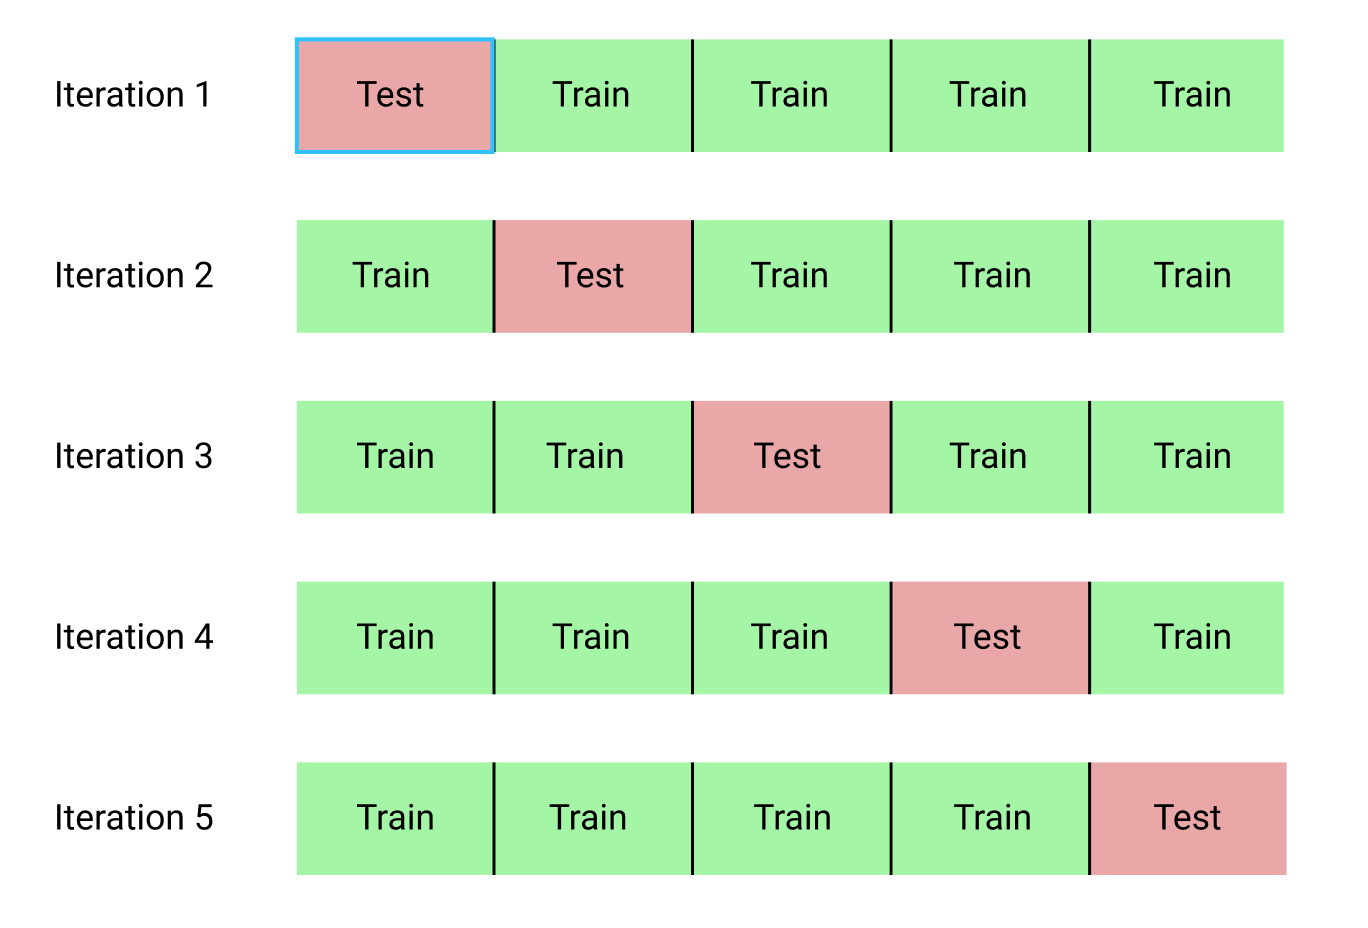
Picture Source: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85

## Task 1 
Obtain the predicted variables Ypredict by using the training data (Xtrain and Ytrain) using the 10-fold cross-validation procedure. You can achieve this by using the function `skl.model_selection.cross_val_predict`. Then, evaluate and return the model's accuracy using the training labels Ytrain and the function `evaluate` that you will add further below.

In [ ]:
def train_model_cross_val(Xtrain, Ytrain, vec, c): #Linear SVC model cross-validation
    """
    10-fold-cross-validation on validation set. 

    Arguments:
        Xtrain(list): training data
        Ytrain(list): target
        vec(sklearn.feature_extraction.text.TfidfVectorizer): sklearn vectorizer
        c(float): value of the regularization parameter of the Vectorizer

    Returns:
        None    
    """
    print('\n***10-fold cross-validation***')

    #create a sklearn pipeline to assemble two steps that can be cross-validated together while setting different parameters
    pipeline = skl.pipeline.Pipeline([
        ('features', skl.pipeline.FeatureUnion(
            [vec],
        )),
        ('classifier', skl.svm.LinearSVC(

        ))
        ])
    
    
    # TODO: Obtain the predicted variables Ypredict by using the training
    # data (Xtrain and Ytrain) using the 10-fold cross-validation
    # procedure. Then, evaluate and return the model's
    # accuracy using the training labels Ytrain.

    # HINT: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
    ###################################################
    ##### WRITE YOUR CODE HERE #######################
    ###################################################    

    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################

## Task 2
Fit the pipeline with the training data and use it to predict on the test data (violation only). Then evaluate the performance using the `evaluate` function specified further below.

In [ ]:
def train_model_test(Xtrain, Ytrain, Xtest_v, Ytest_v, vec, c):
    """
    Evaluation on test set.
    
    Arguments:
        Xtrain(list): training data
        Ytrain(list): target data
        Xtest_v(): test data of the class violation
        Ytest_v(): test data targets of the class violation
        vec(sklearn.feature_extraction.text.TfidfVectorizer): sklearn vectorizer
        c(float): value of the regularization parameter of the Vectorizer

    Returns:
        None    
    """
    #again, build a sklearn pipeline as above
    pipeline = skl.pipeline.Pipeline([
        ('features', skl.pipeline.FeatureUnion([vec]
        )),
        ('classifier', skl.svm.LinearSVC(C=c))
        ])
    
    # fit the pipeline with the training data and use it
    # to predict on the test data (violation only)
    # TODO: insert your code for experiments
    # HINT: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
  
    ###################################################
    ##### WRITE YOUR CODE HERE #######################
    ###################################################

    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################
    
    # TODO: Evaluate the fitted model using the evaluate function
    # HINT: You need to use Task 3
    ###################################################
    ##### WRITE YOUR CODE HERE #######################
    ###################################################

    print('***testing on violation testset***')
    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################
  


## Task 3
Calculate different evaluation metrics by comparing true and predicted labels. All of them are already implemented in the sub-package `sklearn.metrics`.

In [ ]:
def evaluate(Ytest, Ypredict):
      """
      Prints evaluation of the model: accuracy, precision, recall, f-score, confusion matrix

      Arguments: 
          Ytest(list): target data from test set
          Ypredict(list): predicted target data

      Returns: 
          score: accuracy of predictions
      """
      # Calculate the accuracy score using the skl.metrics.accuracy_score
      # function, using the Ytest and Ypredict arguments.
      # Additionally, produce a classification report (with
      # precision, recall, f-score, confusion matrix) using
      # functions skl.metrics.classification_report, skl.metrics.precision_recall_fscore_support,
      # skl.metrics.confusion_matrix
      # HINT: set parameter average='macro' to the 
      # precision_recall_fscore_support function.
      ###################################################
      ##### WRITE YOUR CODE HERE #######################
      ###################################################
      score = ...
      conf_matrix = ...
      ###################################################
      ##### YOUR CODE ENDS HERE #########################
      ###################################################
      print('Accuracy:',  score, '\n')
      #print('\nClassification report:\n', report)
      #print('\nCR:', prec_rec_fscor_supp)
      print('\nConfusion matrix:\n', conf_matrix, '\n\n_______________________\n\n')
      return(score)

## Execute the pipeline for each article

In [ ]:
def run_pipeline(part, vec, c):

   # This pipeline function puts all of the previously defined functions together
   # and executes them in the correct order with the corresponding arguments.
    """
    Executes the following functions:
    1a. extract_parts() on all training data texts for both labels violation and non-violation
    1b. extract_parts() on  all test data texts only for violation
        -> extract_parts() calls extract_text within the function
    2a. train_model_test()
    2b. train_model_cross_val()

    Arguments:
        part():
        vec(skl.feature_extraction.text.TfidfVectorizer): sklearn vectorizer
        c(float): value of the regularization parameter of the Vectorizer
        
    Returns:
        The function train_model_cross_val
    """
    
    print('Trained on *' + part + '* part of the cases')
    
    #put together the paths to the different training data files
    path = './data/'
    v = extract_parts(path+'train/'+article+'/violation/*.txt', 'violation', part)
    nv = extract_parts(path+'train/'+article+'/non-violation/*.txt', 'non-violation', part)
    trainset = v+nv #the training set consists of text files from oth classes, violation v and non-violin nv
    shuffle(trainset) #mix violation and non-violation texts
    
    #split the training data into texts and their labels
    Xtrain = [i[0] for i in trainset]
    Ytrain = [i[1] for i in trainset]
    
    #extract the relevant sections from the texts of the test set. 
    #the relevant sections of the three articles are defined in the main function the cell below
    #e.g. procedure+facts for article 2
    test = extract_parts('./data/test_violations/'+article+'/*.txt', 'violation', part)
    #split the test data into texts and their labels
    Xtest_v = [i[0] for i in test]
    Ytest_v = [i[1] for i in test]
        
  
    print('Training on', Ytrain.count('violation'),'+', Ytrain.count('non-violation'), '=', 
          Ytrain.count('violation') + Ytrain.count('non-violation'), 'cases', 
          '\nCases available for testing(violation):', Ytest_v.count('violation'))
    #return(train_model_cross_val(Xtrain, Ytrain, vec, c)) #use for cross-validation
    return(train_model_test(Xtrain, Ytrain, Xtest_v, Ytest_v, vec, c))

In [ ]:
if __name__ == "__main__":

    # We train and test the model only for three different articles: 2, 3 and 11
    articles = ['Article2', 'Article3', 'Article11']
    c = 1
    for article in articles: 
        # iterate over the articles and set the parameters seperately for each model
        if article == 'Article2':
            vec = ('wordvec', TfidfVectorizer(analyzer = 'word', 
                                              ngram_range = (3,4), binary = False, 
                                              lowercase = True, min_df = 2, 
                                              norm = 'l2', stop_words = None, use_idf = True))
            run_pipeline('procedure+facts', vec, c)

        if article == 'Article3':
            vec = ('wordvec', TfidfVectorizer(analyzer = 'word', binary = True,  
                                              lowercase = True,  min_df = 1,  
                                              ngram_range = (1,1),  norm = None,  
                                              stop_words = None,  use_idf = True))
            run_pipeline('facts', vec, c)
            
        if article == 'Article11':
            vec = ('wordvec', TfidfVectorizer(analyzer = 'word', binary = False,  
                                              lowercase = True,  min_df = 2,  
                                              ngram_range = (1, 1),  norm = 'l1',  
                                              stop_words = 'english',  use_idf = False))
            run_pipeline('procedure', vec, c)

As a side note on the example, while we are aware that testing the model on one class can be a bit ill-posed, this is the only data we are provided with. It might not be the best example when one is introduced to a new model for the first time, but one can still take away the motivation as well as relevant transofrmations of the features as an interesting example of classifying text data.

Some of the parameters e.g. ngram_range or stop_words were specificed based on results from the following article 
https://martijnwieling.nl/files/Medvedeva-submitted.pdf

## Task 4: Choose whether to include stopwords in the model
#### Stopwords
Stopwords are frequently occurring words that don't carry a lot of meaning e.g. "the", "a", "of". They are often removed before conduncting text analysis or machine learning of text data because the are rhather noise than helpful. Sometimes, however, moldels perform better when keeping the stopwords. So we want to find out if our model performs better or worse including stopwords.

In [ ]:
if __name__ == "__main__":
    stop_words_vec = [None,'english']
    article = 'Article11'
    for i in stop_words_vec:
      print("Using ",i, " as parameter for stopwords")
      # TODO: test whether for Article 11, it is better
      # to train the model using stopwords or excluding
      # them (hint: start from the code from the previous
      # cell and use it to test the stopword parameter).
      # Specify a vector with the suitable parameters and 
      # use the run_pipeline function.
      ###################################################
      ##### WRITE YOUR CODE HERE #######################
      ###################################################

      ###################################################
      ##### YOUR CODE ENDS HERE #########################
      ###################################################


In [ ]:
# TODO: based on the previous task, assign the stopword value to variable stop_word_choice
###################################################
##### WRITE YOUR CODE HERE #######################
###################################################
stop_word_choice = ...
###################################################
##### YOUR CODE ENDS HERE #########################
###################################################

### Write your answer here:
It is better to train the model on Article 11 using/not using stopwords

## Task 5: FIND THE BEST REGULARIZATION PARAMETER "C"
#### Regularization parameter c
The regularization parameter c is a very import hyperparamter for our SVM machine learning model. If it is well chosen, it balances well between a simple model and an accurate model (graph in the middle). If C is large, the accuracy of the model is more important - this means we get more correct results on the training set but we risk overfitting (graph on the right). If it fits every data point perfectly, it doesn't generalize well and will have a poor performance on unseen data. On the other hand, if C is too small, the model is too general and doesn't fit the data points (graph on the left).

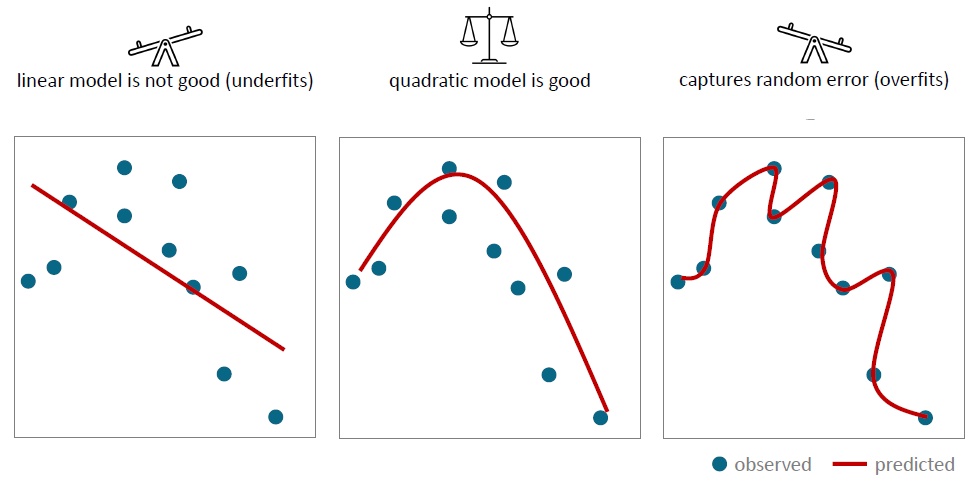

(Slightly modified slide from Nora Hollenstein)


In [ ]:
if __name__ == "__main__":
    stop_words_vec = [None,'english']
    c_vector = [0.1,1,5]
    accuracy_results = []
    article = 'Article11'

    
    for c in c_vector:
      ###################################################
      ##### WRITE YOUR CODE HERE ########################
      ###################################################
      #HINT: Define the vector based on the suitable
      # parameters and then append the accuracy_results
      # list with the accuracy_score
      
      ###################################################
      ##### YOUR CODE ENDS HERE #########################
      ###################################################


In [ ]:
# TODO: Plot the accuracy results when the regularization vector varies
# HINT: use plt.plot on the suitably set
# x and y values.
###################################################
##### WRITE YOUR CODE HERE ########################
###################################################

###################################################
##### YOUR CODE ENDS HERE #########################
###################################################

### Record your finding here!
The best regularization parameter for model trained on Article 2 data is achieved with regularization parameter c = ???

## Task 6: Find the best LOWER CASE parameter
Converting all words to their lower case version is a very common text preprocessing step in machine learning. It makes quantifications more transparent because often it does not matter if a word occurs at the beginning (->capitalized) or in the middle (->lowercased) of a sentence. However, sometimes a model performs better if it has that information and it is thus better to keep the capitalization from the raw text. We want to find out for article 11 if the model performs better keeping or removing the capitalization of words.

In [ ]:
if __name__ == "__main__":
    lower_case = [True,False]
    accuracy_results = []
    article = 'Article11'

    
    for i in lower_case:
    ###################################################
    ##### WRITE YOUR CODE HERE #######################
    ###################################################
    # HINT: same as the previous task
    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################

### Write your answer here:
It is better to train the model on Article 11 reducing all text to lowercase/keeping the original upper and lowercase letters.